### Exploratory Data Analysis

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [114]:
#reading in the dataset "livebook"
livebook = pd.read_csv(r"C:\Users\USER\Downloads\actions2load.csv\actions2load.csv")
livebook.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [115]:
#check the number of rows and columns of the dataset
livebook.shape

(3242076, 5)

In [116]:
#check some other details of the data
livebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_time       object
 2   event_type       object
 3   product_id       int64 
 4   additional_data  object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


In [117]:
#check for missing values 
livebook.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

In [118]:
#check for duplicates
livebook.duplicated().sum()

514

In [119]:
#check the number of unique categories
livebook.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

Text(0.5, 1.0, 'Cardinality')

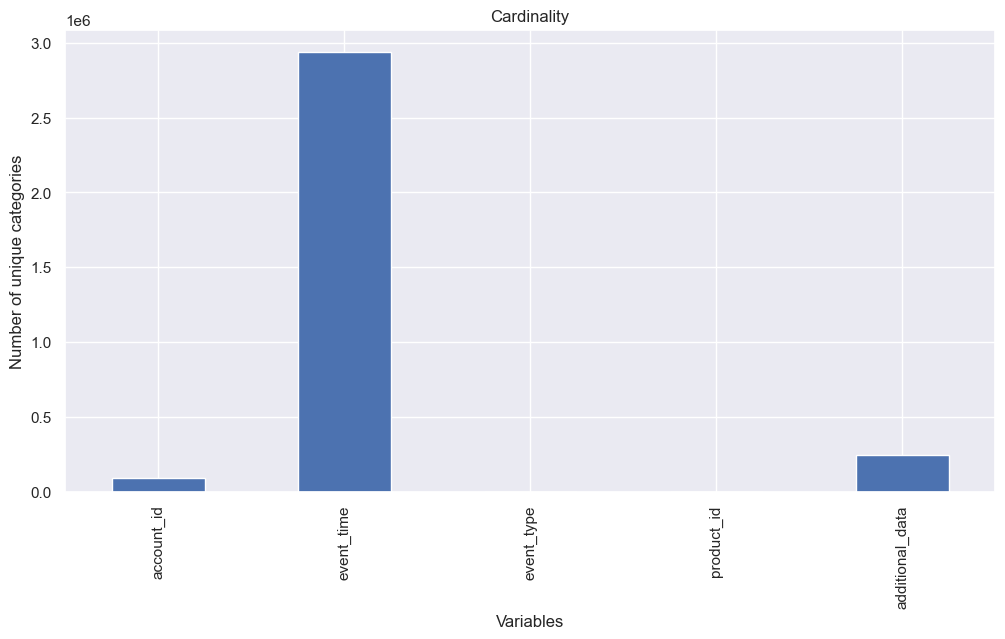

In [120]:
# plot a graph with the cardinality of each variable:
livebook.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [121]:
#check the number of accounts on livebook 
livebook['account_id'].nunique()

89467

In [122]:
#check the number of events 
livebook['event_type'].nunique()

35

In [123]:
#check the number of times events occured on livebook 
livebook['event_time'].nunique()

2940583

In [124]:
#check the number of events that occured per time
livebook['event_time'].value_counts()

2020-05-25 21:06:11.342    11
2020-04-23 16:07:05.889     9
2020-02-16 09:02:34.838     9
2020-04-13 21:57:31.173     8
2020-04-11 19:05:24.556     8
                           ..
2020-03-13 04:54:02.188     1
2020-03-13 04:54:02.189     1
2020-03-13 04:54:03.769     1
2020-03-13 04:54:03.768     1
2020-06-04 04:20:13.271     1
Name: event_time, Length: 2940583, dtype: int64

In [125]:
#check the number of times each account carried out an event
livebook['account_id'].value_counts()

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [126]:
acct_events = livebook['account_id'].value_counts()

In [127]:
#put the result in a dataframe and reset index
acct_events = acct_events.to_frame().reset_index()

In [128]:
acct_events.columns = ["Account_id","event_count"]

In [129]:
acct_events

,Account_id,event_count
0,6bb61e3b7bce0931da574d19d1d82c88,1371593
1,86c876e217ae1ca1cd2986c5521a9768,17357
2,0c2a23a1ce63aa22296072df5cd065f7,5697
3,954c5420b7247345858b62c84d606bb7,5690
4,4de78691553567a9b9e20fde6667773b,4890
...,...,...
89462,8a831a7856dc0da98c6be48f705dcce8,1
89463,155487ef76edc522f21a6fb177eaed78,1
89464,bb7c0b0484f1908b7d85520a0429a826,1
89465,b615e5a363163bc167b877cf34037568,1


In [130]:
#check the number of account_ids per event_count 
accts_per_eventcount = acct_events.groupby('event_count').count()
accts_per_eventcount

,Account_id
event_count,
1,16070
2,11227
3,7089
4,5415
5,4296
...,...
4890,1
5690,1
5697,1


In [131]:
accts_per_eventcount.head(20)


,Account_id
event_count,
1,16070
2,11227
3,7089
4,5415
5,4296
6,3550
7,3219
8,2927
9,2730


From the above result, we can see that most accounts (16070 in number) carried out only one event

In [132]:
accts_per_eventcount.tail(20)

,Account_id
event_count,
1891,1
1902,1
1945,1
2091,1
2142,1
2186,1
2317,1
2322,1
2358,1


In [133]:
#check the accounts with the top 20 events 
livebook['account_id'].value_counts().head(20)

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
023f544de40fb3c2ca4157950d64b2bc       4529
caffe2b03e6057845c52212acaaa1a34       4189
c5a4e7e6882845ea7bb4d9462868219b       4090
4f81b1d964419548f01ca35bbaeeda75       3209
3eff5d4b55889abb0a8b08d2136f1b63       2707
1cb86261dce6b616c5b77e591be114b6       2396
af4aee059f0e65cac9f5660fac3bda73       2358
6f4a17e710772ae54e2eae06cb0fd028       2322
5f0c27b791e52bd39a208b4e5a8ad94d       2317
ca0fc1cc0a47d908c45ed000e08fbc65       2186
cd599de17920ac7f372f61b4ba66597d       2142
482404b0f54794c41b7989a454c76592       2091
ba5fcb73438bf24ee2568a0a0ba30ddc       1945
007c07faa0ccfb49ec117750a5c1f990       1902
c00614af33e236ce1ac4f0ccbf2c3d26       1891
Name: account_id, dtype: int64

In [134]:
#reset index of the value counts after grouping
accts_per_eventscount = accts_per_eventcount.reset_index()

In [135]:
accts_per_eventscount

,event_count,Account_id
0,1,16070
1,2,11227
2,3,7089
3,4,5415
4,5,4296
...,...,...
655,4890,1
656,5690,1
657,5697,1
658,17357,1


In [136]:
#check percentage of accounts that did only one event to total number of accounts
perc_of_one_event = 16070/livebook['account_id'].nunique()
perc_of_one_event

0.17961930097130785

Approximately 18% of the accounts on livebook has done only one event (which event did this 17% carry out)

In [137]:
#check the categories of events 
livebook['event_type'].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [138]:
#check the number of times each event type occured and assign the value_counts to a variable
freq_of_events = livebook['event_type'].value_counts()
freq_of_events

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

Text(0.5, 1.0, 'Frequency of events on livebook')

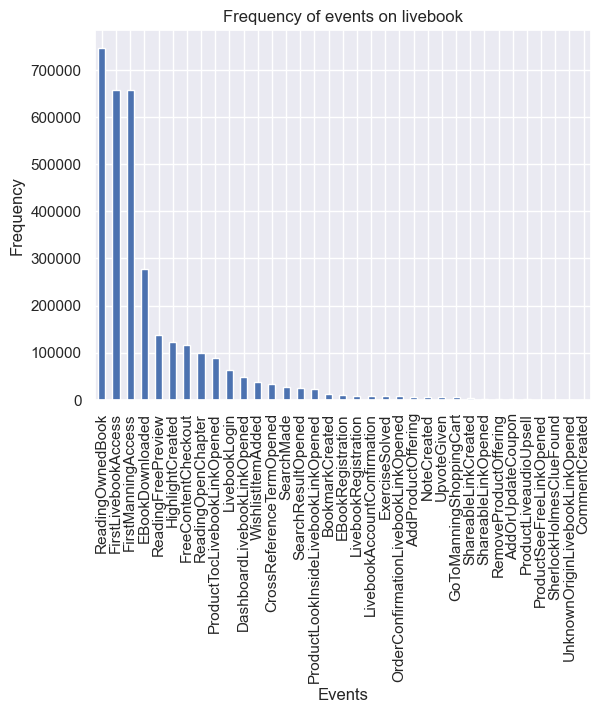

In [139]:
#plot a graph to inspect the frequency of events on livebook 

fig = freq_of_events.sort_values(ascending=False).plot.bar()
fig.set_ylabel('Frequency')
fig.set_xlabel('Events')
fig.set_title('Frequency of events on livebook')

## PROJECT QUESTIONS

### STEP 1

### Question 4a: Do events happen equally at different times of the day or are there patterns (give visualizations)?

In [140]:
# converting event_time to datetime format in order to create a variable for hours

livebook['event_time']=pd.to_datetime(livebook['event_time'])

In [141]:
#Create a new column showing hours
livebook['event_hour'] = livebook['event_time'].dt.hour

In [142]:
#create time periods function

def TimePeriod(hour):
    if 0 < hour < 6:
        period = "Dawn"
    elif 5 < hour < 12:
        period = "Morning"
    elif 11 < hour < 17:
        period = "Afternoon"
    elif 16 < hour < 20:
        period = "Evening"
    else:
        period = "Night"
    return period

In [143]:
livebook['time_of_day'] = livebook['event_hour'].apply(TimePeriod)

In [144]:
#checking the dataset for the new variable "time of day"

livebook.head()

,account_id,event_time,event_type,product_id,additional_data,event_hour,time_of_day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,12,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,12,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,12,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,12,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,12,Afternoon


In [145]:
livebook['time_of_day'].value_counts()

Afternoon    839437
Morning      805110
Night        618664
Dawn         524316
Evening      454549
Name: time_of_day, dtype: int64

In [146]:
#value count of the event_hours variable

event_hour = livebook['event_hour'].value_counts()
event_hour

14    178815
15    175232
13    168844
16    164146
17    154538
12    152400
19    150504
18    149507
20    145356
9     140293
11    140214
10    139052
8     136298
21    135902
7     132807
0     124535
6     116446
22    115755
1     110457
2     107778
5     106103
3     102092
4      97886
23     97116
Name: event_hour, dtype: int64

In [147]:
#creating time periods function to get the time of day

def TimePeriod(event_hour):
    if 0 <= event_hour < 6:
        period = "Dawn"
    elif 6 < event_hour < 12:
        period = "Morning"
    elif 12 < event_hour < 16:
        period = "Afternoon"
    elif 16 < event_hour < 20:
        period = "Evening"
    else:
        period = "Night"
    return period

In [148]:
# Value count of time of day

time_of_day = livebook['time_of_day'].value_counts()

Text(0.5, 1.0, 'FREQUENCY OF EVENTS PER HOUR')

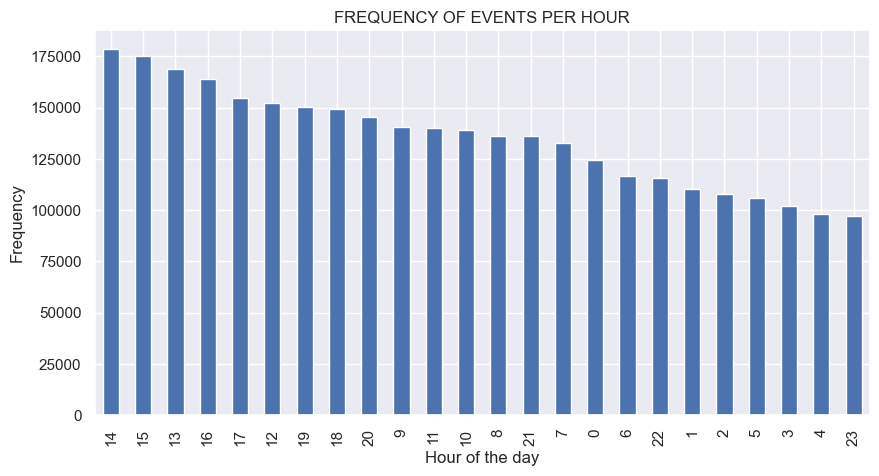

In [149]:
#plotting a bar chart to visualize event hours

event_hour.plot.bar(figsize=(10,5))
plt.ylabel('Frequency')
plt.xlabel('Hour of the day')
plt.title('FREQUENCY OF EVENTS PER HOUR')

Text(0.5, 1.0, 'EVENTS DURING DIFFERENT TIMES OF THE DAY')

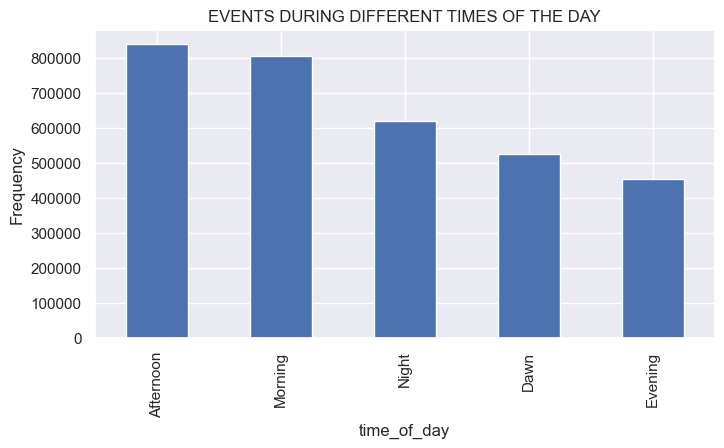

In [150]:
#plot a graph to visualize events during different times of the day

time_of_day.plot.bar(figsize=(8,4))
plt.ylabel('Frequency')
plt.xlabel('time_of_day')
plt.title('EVENTS DURING DIFFERENT TIMES OF THE DAY')

As we can see from the hour and time_of_day graphs, events do not happen equally at dfferent times of the day. 
Most events happen in the afternoon, followed by morning, night, dawn and least events happen during the evening. 

### Question 4b: Analyze “a particular account_id” for insights on how the person uses the service at different times of the day (Visualizations)?

In [151]:
#add more time columns to the dataset
#create more columns from date variable

livebook['event_year']=livebook['event_time'].dt.year
livebook['event_month']=livebook['event_time'].dt.month
livebook['event_date'] = livebook['event_time'].dt.day
livebook['event_day'] = livebook['event_time'].dt.day_name()
livebook['event_week']= livebook['event_time'].dt.isocalendar().week

In [152]:
def Quarter(event_month):
    if 0 < event_month < 4:
        period = 1
    elif 3 < event_month < 7:
        period = 2
    elif 6 < event_month < 10:
        period = 3
    else:
        period = 4
    return period

In [153]:
livebook['quarter'] = livebook['event_month'].apply(Quarter)

In [154]:
#account_id = 'eaecfa7b11e62308832d07ac94dcda6a'
account_data = livebook[livebook['account_id'] == 'eaecfa7b11e62308832d07ac94dcda6a']

In [155]:
account_data

,account_id,event_time,event_type,product_id,additional_data,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,60s,12,Afternoon,2019,11,29,Friday,48,4
8,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:13:00.492,ReadingOwnedBook,887,120s,12,Afternoon,2019,11,29,Friday,48,4
15,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:15:00.768,ReadingOwnedBook,887,240s,12,Afternoon,2019,11,29,Friday,48,4
403,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 13:36:05.895,ReadingOwnedBook,887,480s,13,Afternoon,2019,11,29,Friday,48,4
1865,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:40:40.902,ReadingOwnedBook,887,600s,19,Evening,2019,11,29,Friday,48,4
1874,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:42:40.906,ReadingOwnedBook,887,720s,19,Evening,2019,11,29,Friday,48,4
1888,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:47:11.172,ReadingOwnedBook,887,960s,19,Evening,2019,11,29,Friday,48,4
1897,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:51:11.232,ReadingOwnedBook,887,1200s,19,Evening,2019,11,29,Friday,48,4
2975,eaecfa7b11e62308832d07ac94dcda6a,2019-11-30 00:09:18.351,ReadingOwnedBook,887,60s,0,Night,2019,11,30,Saturday,48,4
319970,eaecfa7b11e62308832d07ac94dcda6a,2020-01-02 13:34:52.613,EBookDownloaded,887,NaN,13,Afternoon,2020,1,2,Thursday,1,1


In [156]:
account_data.shape

(10, 13)

In [157]:
account_data['event_time'].nunique()

10

In [158]:
account_data['event_time'].value_counts()

2019-11-29 12:12:00.402    1
2019-11-29 12:13:00.492    1
2019-11-29 12:15:00.768    1
2019-11-29 13:36:05.895    1
2019-11-29 19:40:40.902    1
2019-11-29 19:42:40.906    1
2019-11-29 19:47:11.172    1
2019-11-29 19:51:11.232    1
2019-11-30 00:09:18.351    1
2020-01-02 13:34:52.613    1
Name: event_time, dtype: int64

In [159]:
account_data['event_year'].value_counts()

2019    9
2020    1
Name: event_year, dtype: int64

In [160]:
account_data['event_month'].value_counts()

11    9
1     1
Name: event_month, dtype: int64

In [161]:
account_data['event_week'].value_counts()

48    9
1     1
Name: event_week, dtype: Int64

In [162]:
account_data['event_date'].value_counts()

29    8
30    1
2     1
Name: event_date, dtype: int64

In [163]:
account_data['event_day'].value_counts()

Friday      8
Saturday    1
Thursday    1
Name: event_day, dtype: int64

In [164]:
account_data['time_of_day'].value_counts()

Afternoon    5
Evening      4
Night        1
Name: time_of_day, dtype: int64

In [165]:
account_data_period = account_data['time_of_day'].value_counts()

Text(0.5, 1.0, 'Events During Different Times of the Day')

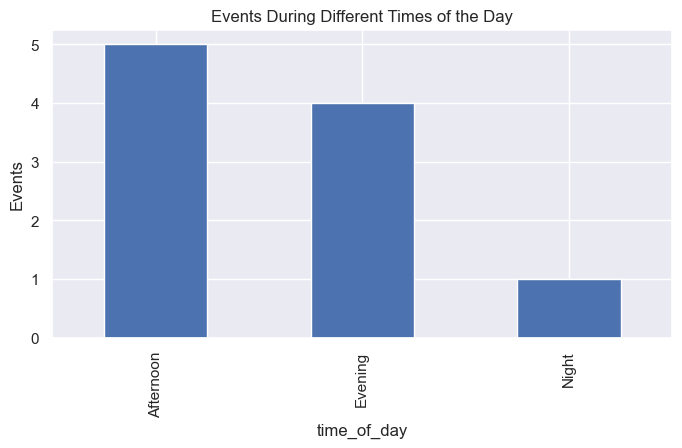

In [166]:
#plot a graph to visualize the account's events during different times of the day

account_data_period.plot.bar(figsize=(8,4))
plt.ylabel('Events')
plt.xlabel('time_of_day')
plt.title('Events During Different Times of the Day')

This account did most events on Friday, November 29, 2019. 
The account did carried out five events in the afternoon, four in the evening and one at night.

### Question 4c: Are there any gaps(missing data) in the record of any events?

In [171]:
livebook.head()

,account_id,event_time,event_type,product_id,additional_data,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,12,Afternoon,2019,11,29,Friday,48,4
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,12,Afternoon,2019,11,29,Friday,48,4
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,12,Afternoon,2019,11,29,Friday,48,4
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,12,Afternoon,2019,11,29,Friday,48,4
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,12,Afternoon,2019,11,29,Friday,48,4


In [172]:
livebook.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
event_hour              0
time_of_day             0
event_year              0
event_month             0
event_date              0
event_day               0
event_week              0
quarter                 0
dtype: int64

In [173]:
Perc_of_missing_data = livebook.isnull().mean()
Perc_of_missing_data

account_id         0.000000
event_time         0.000000
event_type         0.000000
product_id         0.000000
additional_data    0.159195
event_hour         0.000000
time_of_day        0.000000
event_year         0.000000
event_month        0.000000
event_date         0.000000
event_day          0.000000
event_week         0.000000
quarter            0.000000
dtype: float64

Text(0.5, 1.0, 'QUANTIFYING MISSING DATA')

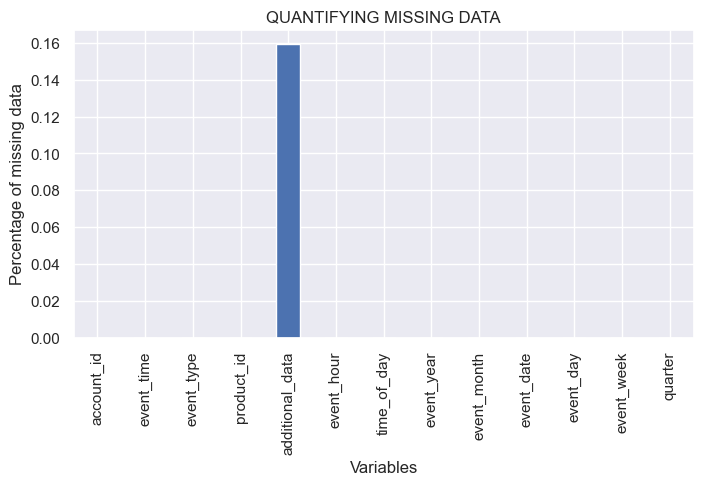

In [174]:
#plotting a bar chart to visualize missing data

Perc_of_missing_data.plot.bar(figsize=(8,4))
plt.ylabel('Percentage of missing data')
plt.xlabel('Variables')
plt.title('QUANTIFYING MISSING DATA')

Answer: There are no missing gaps or data in the record of any events, which are in event_time and event_type. 
        The only variable with missing data is additional_data.

### Question 4d: Are there any extreme outliers (class imbalances) in the number of events?

In [175]:
#check the number of unique categories in event_type
livebook['event_type'].nunique()

35

In [176]:
#check the unique values in event_type

livebook['event_type'].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [177]:
#count the number of times each event was carried out

livebook['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

Text(0.5, 1.0, 'Frequency of event types')

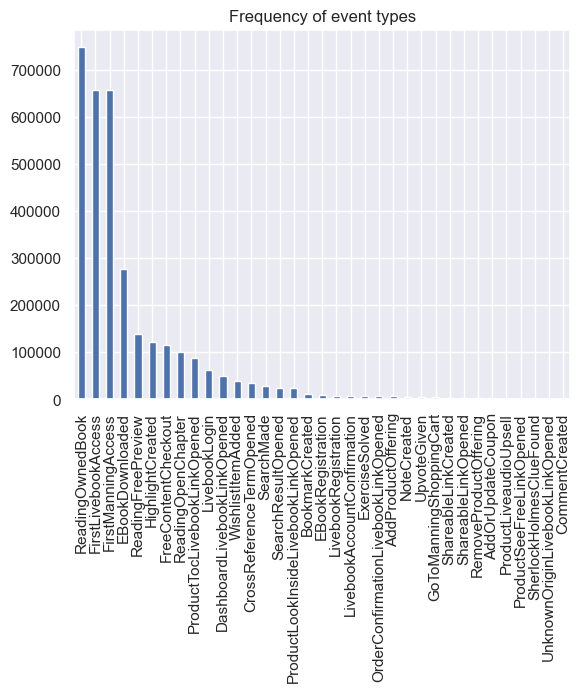

In [178]:
#plot a graph to visualize the events count
fig = livebook['event_type'].value_counts().plot.bar()
fig.set_title('Frequency of event types')

In [179]:
#assign the events value count to a variable
events_count = livebook['event_type'].value_counts()

In [180]:
#reset the index and assign to a variable
events_count = events_count.to_frame().reset_index()

In [181]:
#assign columns to event_count

events_count.columns = ["event_type","count"]
x = events_count['event_type']
y = events_count['count']

events_count

,event_type,count
0,ReadingOwnedBook,748260
1,FirstLivebookAccess,658226
2,FirstManningAccess,657340
3,EBookDownloaded,277356
4,ReadingFreePreview,138197
5,HighlightCreated,121643
6,FreeContentCheckout,116183
7,ReadingOpenChapter,100004
8,ProductTocLivebookLinkOpened,88130
9,LivebookLogin,62484


Text(0.5, 1.0, 'Checking for outliers')

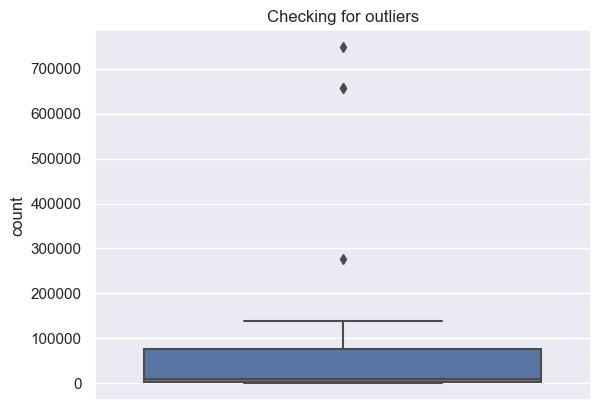

In [182]:
#use boxplot to check for outliers
import seaborn as sns

sns.boxplot(y=events_count['count'])
plt.title('Checking for outliers')


{'whiskers': [<matplotlib.lines.Line2D at 0x1d72f2c7b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d72f2d7160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d72f2c78b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d72f2d7700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d72f2d79d0>],
 'means': []}

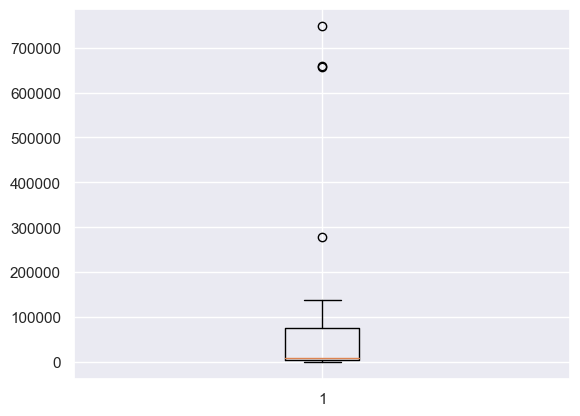

In [183]:
plt.boxplot(events_count['count'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

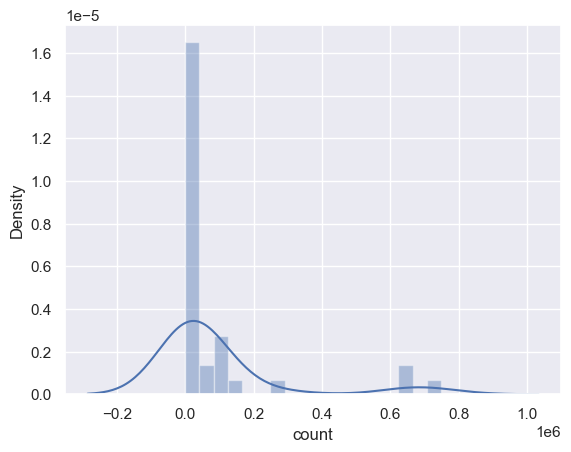

In [184]:
sns.distplot(events_count['count'])

### Question 5: Ensure data quality assurance
• Fix bad data
• Correct any missing data/gaps
• Fix class imbalance in the “events”

In [185]:
livebook.head()

,account_id,event_time,event_type,product_id,additional_data,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,12,Afternoon,2019,11,29,Friday,48,4
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,12,Afternoon,2019,11,29,Friday,48,4
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,12,Afternoon,2019,11,29,Friday,48,4
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,12,Afternoon,2019,11,29,Friday,48,4
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,12,Afternoon,2019,11,29,Friday,48,4


In [186]:
#drop columns not needed
livebook.drop(['additional_data'], axis=1, inplace=True) 

In [187]:
#drop duplicated rows in the dataset
livebook.drop_duplicates()

,account_id,event_time,event_type,product_id,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,12,Afternoon,2019,11,29,Friday,48,4
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,12,Afternoon,2019,11,29,Friday,48,4
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,12,Afternoon,2019,11,29,Friday,48,4
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,12,Afternoon,2019,11,29,Friday,48,4
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,12,Afternoon,2019,11,29,Friday,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1,4,Dawn,2020,6,4,Thursday,23,2
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1,4,Dawn,2020,6,4,Thursday,23,2
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1,4,Dawn,2020,6,4,Thursday,23,2
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1,4,Dawn,2020,6,4,Thursday,23,2


In [188]:
# Fix class imbalance in the events

# define function to remove outliers
def drop_outlier(data,var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace = True)
    return data

In [189]:
#drop outliers in events
events_count = drop_outlier(events_count, 'count') 

## Step 2

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [191]:
livebook.head()

,account_id,event_time,event_type,product_id,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,12,Afternoon,2019,11,29,Friday,48,4
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,12,Afternoon,2019,11,29,Friday,48,4
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,12,Afternoon,2019,11,29,Friday,48,4
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,12,Afternoon,2019,11,29,Friday,48,4
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,12,Afternoon,2019,11,29,Friday,48,4


In [192]:
#account_id = 'eaecfa7b11e62308832d07ac94dcda6a'
account_data = livebook[livebook['account_id'] == 'eaecfa7b11e62308832d07ac94dcda6a']

In [193]:
#reset index for the account analysed and check the data

account_data = account_data.reset_index()
account_data.head()

,index,account_id,event_time,event_type,product_id,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,12,Afternoon,2019,11,29,Friday,48,4
1,8,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:13:00.492,ReadingOwnedBook,887,12,Afternoon,2019,11,29,Friday,48,4
2,15,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:15:00.768,ReadingOwnedBook,887,12,Afternoon,2019,11,29,Friday,48,4
3,403,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 13:36:05.895,ReadingOwnedBook,887,13,Afternoon,2019,11,29,Friday,48,4
4,1865,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:40:40.902,ReadingOwnedBook,887,19,Evening,2019,11,29,Friday,48,4


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
#split dataset into train and test data

train,test = train_test_split(
    account_data, test_size=0.2, 
    random_state=123)

#I am using 30% for my test because the dataset is very small

In [196]:
#reset index for train and test datasets

train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)

In [197]:
train

,index,account_id,event_time,event_type,product_id,event_hour,time_of_day,event_year,event_month,event_date,event_day,event_week,quarter
0,1897,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:51:11.232,ReadingOwnedBook,887,19,Evening,2019,11,29,Friday,48,4
1,1874,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:42:40.906,ReadingOwnedBook,887,19,Evening,2019,11,29,Friday,48,4
2,2975,eaecfa7b11e62308832d07ac94dcda6a,2019-11-30 00:09:18.351,ReadingOwnedBook,887,0,Night,2019,11,30,Saturday,48,4
3,403,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 13:36:05.895,ReadingOwnedBook,887,13,Afternoon,2019,11,29,Friday,48,4
4,8,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:13:00.492,ReadingOwnedBook,887,12,Afternoon,2019,11,29,Friday,48,4
5,1888,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:47:11.172,ReadingOwnedBook,887,19,Evening,2019,11,29,Friday,48,4
6,319970,eaecfa7b11e62308832d07ac94dcda6a,2020-01-02 13:34:52.613,EBookDownloaded,887,13,Afternoon,2020,1,2,Thursday,1,1
7,15,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:15:00.768,ReadingOwnedBook,887,12,Afternoon,2019,11,29,Friday,48,4


In [198]:
#Step 1

train['target'] = train['event_time'].shift(1)

In [199]:
#Step 2
#drop columns that are not needed

train.drop(['index','account_id','event_time','product_id','event_week'], axis=1, inplace=True) 

In [200]:
train

,event_type,event_hour,time_of_day,event_year,event_month,event_date,event_day,quarter,target
0,ReadingOwnedBook,19,Evening,2019,11,29,Friday,4,NaT
1,ReadingOwnedBook,19,Evening,2019,11,29,Friday,4,2019-11-29 19:51:11.232
2,ReadingOwnedBook,0,Night,2019,11,30,Saturday,4,2019-11-29 19:42:40.906
3,ReadingOwnedBook,13,Afternoon,2019,11,29,Friday,4,2019-11-30 00:09:18.351
4,ReadingOwnedBook,12,Afternoon,2019,11,29,Friday,4,2019-11-29 13:36:05.895
5,ReadingOwnedBook,19,Evening,2019,11,29,Friday,4,2019-11-29 12:13:00.492
6,EBookDownloaded,13,Afternoon,2020,1,2,Thursday,1,2019-11-29 19:47:11.172
7,ReadingOwnedBook,12,Afternoon,2019,11,29,Friday,4,2020-01-02 13:34:52.613


In [201]:
#Step 3
#check the datatypes

train.dtypes

event_type             object
event_hour              int64
time_of_day            object
event_year              int64
event_month             int64
event_date              int64
event_day              object
quarter                 int64
target         datetime64[ns]
dtype: object

In [202]:
#Step 4
#create a function to convert object variables to categories so as to convert to numerical values(encoding)

train_num = train

for col_name in train_num.columns:
    if(train_num[col_name].dtype == 'object', 'datetime64'):
        train_num[col_name] = train_num[col_name].astype('category')
        train_num[col_name] = train_num[col_name].cat.codes
        
train.head()

,event_type,event_hour,time_of_day,event_year,event_month,event_date,event_day,quarter,target
0,1,3,1,0,1,1,0,1,-1
1,1,3,1,0,1,1,0,1,4
2,1,0,2,0,1,2,1,1,2
3,1,2,0,0,1,1,0,1,5
4,1,1,0,0,1,1,0,1,1


In [203]:
#Step 5
#Split to features and targets

y_train = train['target']
X_train = train.drop(['target'],axis=1)

In [204]:
#Step 6
#define x_train columns

cols = X_train.columns
cols

Index(['event_type', 'event_hour', 'time_of_day', 'event_year', 'event_month',
       'event_date', 'event_day', 'quarter'],
      dtype='object')

In [205]:
#Step 7
#scale x_train  

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [206]:
#Step 8
#put x_train in a dataframe

features = pd.DataFrame(X_train, columns=cols)
features

,event_type,event_hour,time_of_day,event_year,event_month,event_date,event_day,quarter
0,0.377964,1.068103,0.538816,-0.377964,0.377964,0.0,-0.538816,0.377964
1,0.377964,1.068103,0.538816,-0.377964,0.377964,0.0,-0.538816,0.377964
2,0.377964,-1.780172,1.975658,-0.377964,0.377964,2.0,0.898027,0.377964
3,0.377964,0.118678,-0.898027,-0.377964,0.377964,0.0,-0.538816,0.377964
4,0.377964,-0.830747,-0.898027,-0.377964,0.377964,0.0,-0.538816,0.377964
5,0.377964,1.068103,0.538816,-0.377964,0.377964,0.0,-0.538816,0.377964
6,-2.645751,0.118678,-0.898027,2.645751,-2.645751,-2.0,2.334869,-2.645751
7,0.377964,-0.830747,-0.898027,-0.377964,0.377964,0.0,-0.538816,0.377964


<AxesSubplot:>

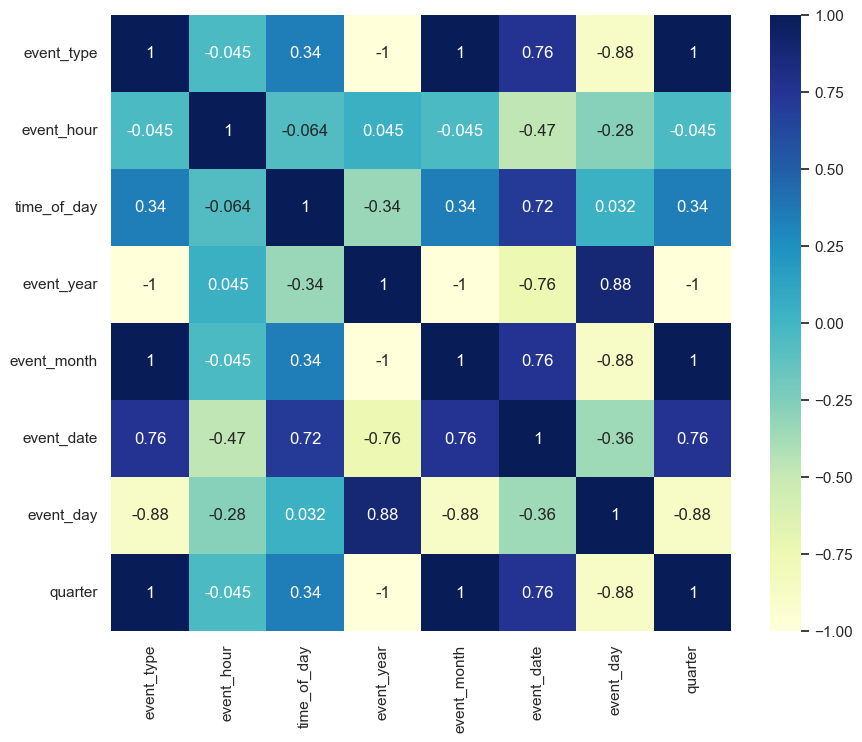

In [207]:
#plot a correlation graph using heatmap to see the correlation between variables

plt.figure(figsize=(10,8))
corre = features.corr()
sns.heatmap(corre, annot= True, cmap="YlGnBu")

In [208]:
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

features.drop(to_drop, axis=1, inplace=True)

***Feature Importance***

In [209]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = cols

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
time_of_day,0.806452
event_hour,0.145161
event_day,0.048387
event_type,0.000000
event_year,0.000000
event_month,0.000000
event_date,0.000000
quarter,0.000000


In [210]:
#Repeat same steps for test
#Step 1

test['target'] = test['event_time'].shift(1)

In [211]:
#Step 2
#drop columns that are not needed

test.drop(['index','account_id','event_time','product_id','event_week'], axis=1, inplace=True) 

In [212]:
#Step 3
#check the datatypes

test.dtypes

event_type             object
event_hour              int64
time_of_day            object
event_year              int64
event_month             int64
event_date              int64
event_day              object
quarter                 int64
target         datetime64[ns]
dtype: object

In [213]:
#Step 4
#create a function to convert object variables to categories so as to convert to numerical values(encoding)

test_num = test

for col_name in test_num.columns:
    if(test_num[col_name].dtype == 'object', 'datetime64'):
        test_num[col_name] = test_num[col_name].astype('category')
        test_num[col_name] = test_num[col_name].cat.codes
        
test

,event_type,event_hour,time_of_day,event_year,event_month,event_date,event_day,quarter,target
0,0,1,1,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0


In [214]:
#Step 5
#Split to features and targets

y_test = test['target']
X_test = test.drop(['target'],axis=1)

In [215]:
#Step 6
#define x_train columns

cols1 = X_test.columns
cols1

Index(['event_type', 'event_hour', 'time_of_day', 'event_year', 'event_month',
       'event_date', 'event_day', 'quarter'],
      dtype='object')

In [216]:
#Step 7
#scale x_train  

#scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [217]:
#scale and fit data

X_test 

array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  0.,  0.,  0.,  0.]])

In [229]:
#import encoder for target data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', drop='first', 
    sparse=False)


In [230]:
#encode and fit target data

y_train=encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test=encoder.fit_transform(y_test.values.reshape(-1, 1))

***Model Building***

In [218]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
    if input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [219]:
def evaluate(model):
    y_train_pred = model.predict(X_train) 
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show() 

Train r2 score:  0.05238095238095242
Test r2 score:  -48.36
train_mse1:  4.975
test_mse1:  12.34


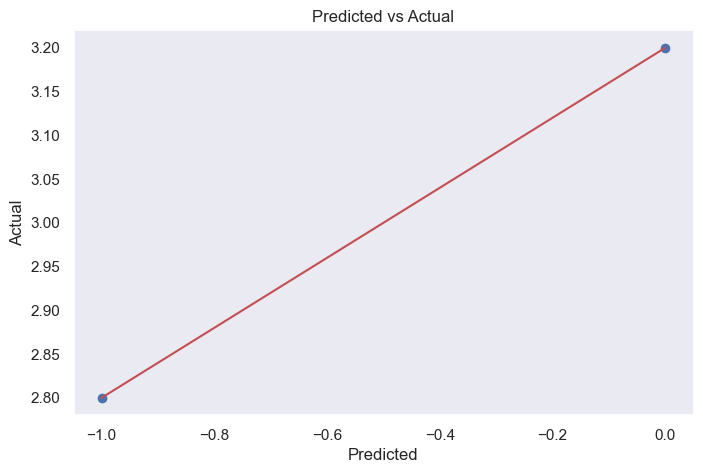

In [220]:
model = model_to_use("KNN")
model.fit(X_train, y_train)
evaluate(model)